## Exploring Rossmann Drug Store Sales Data

In [59]:
import pandas as pd

data = pd.read_csv('../data/rossmann.csv', skipinitialspace=True, low_memory=False)

In [60]:
print data.shape
data.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [61]:
data['Date2'] = pd.to_datetime(data['Date'])

In [62]:
type(data.Date2)

pandas.core.series.Series

In [65]:
data['Date2'].dt.year

0          2015
1          2015
2          2015
3          2015
4          2015
5          2015
6          2015
7          2015
8          2015
9          2015
10         2015
11         2015
12         2015
13         2015
14         2015
15         2015
16         2015
17         2015
18         2015
19         2015
20         2015
21         2015
22         2015
23         2015
24         2015
25         2015
26         2015
27         2015
28         2015
29         2015
           ... 
1017179    2013
1017180    2013
1017181    2013
1017182    2013
1017183    2013
1017184    2013
1017185    2013
1017186    2013
1017187    2013
1017188    2013
1017189    2013
1017190    2013
1017191    2013
1017192    2013
1017193    2013
1017194    2013
1017195    2013
1017196    2013
1017197    2013
1017198    2013
1017199    2013
1017200    2013
1017201    2013
1017202    2013
1017203    2013
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: Date2, dtype: int6

In [17]:
data.Date.dtype

dtype('O')

In [29]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [30]:
data.head()
data.shape

(1017209, 10)

In [31]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [32]:
store1_data = data[data.Store == 1]

In [33]:
type(store1_data)

pandas.core.frame.DataFrame

In [34]:
store1_data.shape

(942, 10)

In [35]:
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales)

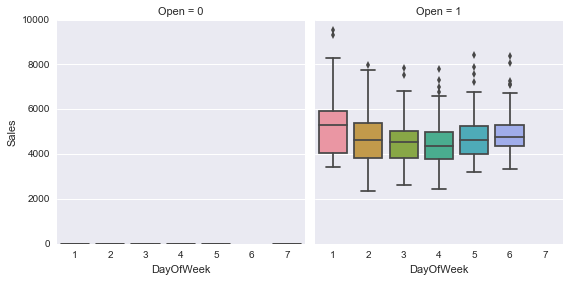

In [37]:
import seaborn as sb
%matplotlib inline
sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box' 
)

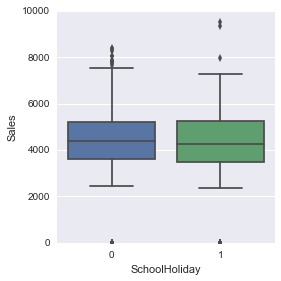

In [38]:
sb.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

What does the plot above tell us about school holiday's vs. regular days?

> Check: See if there is a difference affecting sales on promotion days.

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

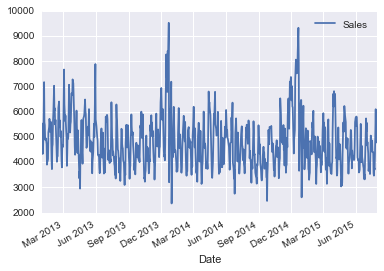

In [41]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()
#store1_data[['Sales']].plot()
#store1_open_data[['Sales','Customers']].plot()

### Autocorrelation

In [47]:
data['Sales'].resample('M').mean().autocorr(lag=12)

0.80727970164527452

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this with the `autocorr` function.

`autocorr` takes one argument, the `lag` - which is how many prior data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it, while setting `lag` to 10, computes the correlation between every point and the point 10 days earlier.

In [49]:
data['Sales'].diff(periods=1).head()

Date
2015-07-31       NaN
2015-07-31     801.0
2015-07-31    2250.0
2015-07-31    5681.0
2015-07-31   -9173.0
Name: Sales, dtype: float64

In [50]:
data['Sales'].resample('D').diff(periods=7).head(14)

C:\Users\byerj023\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05            NaN
2013-01-06            NaN
2013-01-07            NaN
2013-01-08    7759.744139
2013-01-09     714.595516
2013-01-10    1258.892377
2013-01-11    1255.921076
2013-01-12      59.101345
2013-01-13       0.132735
2013-01-14   -4430.547085
Freq: D, Name: Sales, dtype: float64

In pandas we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

### Data Refining Using Time Series Statistics

### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

In [51]:
data[['Sales']].resample('M').mean().head()

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383


In [54]:
data[['Sales']].resample('M').median().head()

,Sales
Date,
2013-01-31,5194.0
2013-02-28,5421.5
2013-03-31,5844.0
2013-04-30,5464.0
2013-05-31,5585.0


While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

**In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.**

In [55]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
#store1_open_data[['Sales']].resample('M').rolling(window=3, center=True).mean().head(10)
store1_open_data[['Sales']].rolling(window=3, center=True, freq="D").mean().head()

C:\Users\byerj023\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\generic.py:5120: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  center=center, win_type=win_type, axis=axis)


,Sales
Date,
2013-01-02,NaN
2013-01-03,4781.000000
2013-01-04,4603.333333
2013-01-05,NaN
2013-01-06,NaN


`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of observations to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

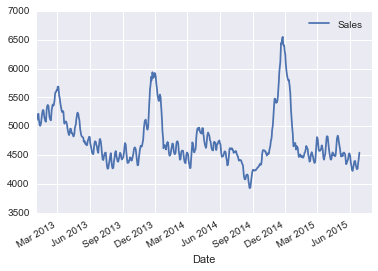

In [56]:
store1_open_data[['Sales']].rolling(window=30).mean().plot()

### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many prio rows to use for the difference.


### Pandas expanding functions

In addition to the set of `rolling_*` functions, Pandas also provides a similar collection of `expanding_*` functions, which, instead of using a window of N values, use all values up until that time.

In [57]:
# computes the average sales, from the first date _until_ the date specified.
store1_open_data[['Sales']].sort_index().expanding(min_periods=1).sum()

,Sales
Date,
2013-01-02,5530.0
2013-01-03,9857.0
2013-01-04,14343.0
2013-01-05,19340.0
2013-01-07,26516.0
2013-01-08,32096.0
2013-01-09,37567.0
2013-01-10,42459.0
2013-01-11,47340.0


## Exercises

> Plot the distribution of sales by month and compare the effect of promotions

> Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

> Plot the 15 day rolling mean of customers in the stores

> Identify the date with largest drop in sales from the same date in the previous month

> Compute the total sales up until Dec. 2014

> Bonus 1: When were the largest differences between 15-day moving/rolling averages?
> HINT: Using `rolling_mean` and `diff`

> Bonus 2: Plot a 15 day exponentially weighted rolling mean of sales in stores
> HINT: We did not specifically do an example of this so you will have to search for info on that Pandas rollig type